In [1136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import category_encoders as ce

In [1730]:
et=pd.read_csv("Train_Data_ET.csv")
et.head()

,ID,Age,Recently_upskilled,Region,RemoteWork,PercentSalaryIncrement,OfficeHours,StockOptionLevel,College_Tier,YearsSinceLastPromotion,...,Department,EnvironmentSatisfaction1,EnvironmentSatisfaction2,JobSatisfaction1,JobSatisfaction2,JobInvolvement1,JobInvolvement2,PerformanceRating1,PerformanceRating2,Employeeturnover
0,45298,33,0,Chennai,0,15,9,1,Tier-3,1.0,...,Ops,NaN,3.0,4.0,2.0,2.0,2.0,2.0,3.0,0
1,172630,34,1,Delhi NCR,0,16,7,0,Tier-3,NaN,...,Finance,2.0,3.0,2.0,NaN,3.0,NaN,NaN,NaN,1
2,63754,33,1,Chennai,0,14,7,0,Tier-3,1.0,...,Sales,NaN,2.0,3.0,NaN,3.0,NaN,2.0,2.0,0
3,107105,38,0,Delhi NCR,0,10,7,1,Tier-3,NaN,...,Sales,4.0,4.0,2.0,NaN,NaN,2.0,3.0,NaN,0
4,173095,28,1,Hyderabad,0,16,7,0,Tier-3,0.0,...,Sales,1.0,2.0,4.0,NaN,3.0,NaN,3.0,4.0,1


In [1731]:
et.drop('ID',axis=1,inplace=True)

In [1732]:
et.loc[:,'envsat']=(et.loc[:,'EnvironmentSatisfaction1']+et.loc[:,'EnvironmentSatisfaction2'])/2
et.loc[:,'jobsat']=(et.loc[:,'JobSatisfaction1']+et.loc[:,'JobSatisfaction2'])/2
et.loc[:,'jobinv']=(et.loc[:,'JobInvolvement1']+et.loc[:,'JobInvolvement2'])/2
et.loc[:,'perf']=(et.loc[:,'PerformanceRating1']+et.loc[:,'PerformanceRating2'])/2

In [1733]:
et.drop(['EnvironmentSatisfaction1','EnvironmentSatisfaction2','JobSatisfaction1','JobSatisfaction2','JobInvolvement1','JobInvolvement2','PerformanceRating1','PerformanceRating2'],axis=1,inplace=True)

In [1734]:
#et.loc[:,'envjob']=(et.loc[:,'envsat']+et.loc[:,'jobsat'])/2
#et.loc[:,'jobperf']=(et.loc[:,'jobinv']+et.loc[:,'perf'])/2

In [1735]:
#et.drop(['envsat','jobsat','jobinv','perf'],axis=1,inplace=True)

In [1736]:
et.loc[:,'yr/sal']=et.loc[:,'TotalWorkExp']/et.loc[:,'MonthlySalary']

In [1737]:
et.loc[:,'yr/com']=et.loc[:,'TotalWorkExp']/et.loc[:,'NumCompaniesWorked']

In [1738]:
et.loc[et.loc[:,'MonthlySalary']>=150000,'sal_bracket']='High'
et.loc[((et.loc[:,'MonthlySalary']>=75000) & (et.loc[:,'MonthlySalary']<150000)),'sal_bracket']='Medium'
et.loc[et.loc[:,'MonthlySalary']<75000,'sal_bracket']='Low'

In [1739]:
et.loc[:,'age/sal']=et.loc[:,'Age']/et.loc[:,'MonthlySalary']

In [1740]:
et.drop('MonthlySalary',axis=1,inplace=True)

In [1741]:
#et.loc[et['Age']<=et['TotalWorkExp']+16,'Age']=et.loc[:,'TotalWorkExp']+16

In [1742]:
et.loc[et.loc[:,'Age']>=45,'age_bracket']='Old'
et.loc[((et.loc[:,'Age']>=30) & (et.loc[:,'Age']<45)),'age_bracket']='Medium'
et.loc[et.loc[:,'Age']<30,'age_bracket']='Youth'

In [1743]:
et.drop('Age',axis=1,inplace=True)

In [1232]:
#encoder=ce.HashingEncoder(cols='DistanceFromHome',n_components=5)

In [1233]:
#et=encoder.fit_transform(et,inplace=True)

In [1234]:
#et.rename(columns={'col_0':'Dis0','col_1':'Dis1','col_2':'Dis2','col_3':'Dis3','col_4':'Dis4'},inplace=True)

In [1235]:
#et.loc[et.loc[:,'DistanceFromHome']>=25,'dis']='Farthest'
#et.loc[((et.loc[:,'DistanceFromHome']>=15) & (et.loc[:,'DistanceFromHome']<25)),'dis']='Far'
#et.loc[((et.loc[:,'DistanceFromHome']>=5) & (et.loc[:,'DistanceFromHome']<15)),'dis']='Medium'
#et.loc[et.loc[:,'DistanceFromHome']<5,'dis']='Near'

In [1236]:
#et.drop('DistanceFromHome',axis=1,inplace=True)

In [1744]:
#et.loc[et.loc[:,'TotalWorkExp']>=36,'exp_bracket']='SrMgr'
#et.loc[((et.loc[:,'TotalWorkExp']>=22) & (et.loc[:,'TotalWorkExp']<36)),'exp_bracket']='MidMgr'
#et.loc[((et.loc[:,'TotalWorkExp']>=8) & (et.loc[:,'TotalWorkExp']<22)),'exp_bracket']='Sr'
#et.loc[et.loc[:,'TotalWorkExp']<8,'exp_bracket']='Fresh'

In [1745]:
#et.drop('TotalWorkExp',axis=1,inplace=True)

In [1746]:
et_dummy = pd.get_dummies(et,drop_first=True)
et_dummy.head()

,Recently_upskilled,RemoteWork,PercentSalaryIncrement,OfficeHours,StockOptionLevel,YearsSinceLastPromotion,JobLevel,TotalWorkExp,yof joining,YearsWithCurrManager,...,MaritalStatus_Single,Gender_Male,Department_Finance,Department_HR,Department_Ops,Department_Sales,sal_bracket_Low,sal_bracket_Medium,age_bracket_Old,age_bracket_Youth
0,0,0,15,9,1,1.0,1,4,2015,3,...,0,0,0,0,1,0,1,0,0,0
1,1,0,16,7,0,NaN,1,8,2015,1,...,1,1,1,0,0,0,1,0,0,0
2,1,0,14,7,0,1.0,1,8,2014,2,...,0,0,0,0,0,1,1,0,0,0
3,0,0,10,7,1,NaN,1,26,2017,1,...,0,1,0,0,0,1,1,0,0,0
4,1,0,16,7,0,0.0,2,3,2015,0,...,0,0,0,0,0,1,1,0,0,1


In [1747]:
et_dummy.columns

Index(['Recently_upskilled', 'RemoteWork', 'PercentSalaryIncrement',
       'OfficeHours', 'StockOptionLevel', 'YearsSinceLastPromotion',
       'JobLevel', 'TotalWorkExp', 'yof joining', 'YearsWithCurrManager',
       'DistanceFromHome', 'NumCompaniesWorked', 'TrainingTimesLastYear',
       'Employeeturnover', 'envsat', 'jobsat', 'jobinv', 'perf', 'yr/sal',
       'yr/com', 'age/sal', 'Region_Chennai', 'Region_Delhi NCR',
       'Region_Hyderabad', 'College_Tier_Tier-2', 'College_Tier_Tier-3',
       'HighestEducation_BA', 'HighestEducation_BBA', 'HighestEducation_CA',
       'HighestEducation_CFA', 'HighestEducation_MBA', 'HighestEducation_MCA',
       'HighestEducation_Mtech', 'BusinessTravel_None',
       'BusinessTravel_Sometimes', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Gender_Male', 'Department_Finance',
       'Department_HR', 'Department_Ops', 'Department_Sales',
       'sal_bracket_Low', 'sal_bracket_Medium', 'age_bracket_Old',
       'age_bracket_Youth'],
  

In [1361]:
from sklearn.model_selection import train_test_split

In [1799]:
Train, Test = train_test_split(et_dummy, test_size=.30, random_state=1,stratify=et_dummy['Employeeturnover'])


In [1800]:
X=Train.drop('Employeeturnover',axis=1)
Y=Train['Employeeturnover']

In [1801]:
X.columns

Index(['Recently_upskilled', 'RemoteWork', 'PercentSalaryIncrement',
       'OfficeHours', 'StockOptionLevel', 'YearsSinceLastPromotion',
       'JobLevel', 'TotalWorkExp', 'yof joining', 'YearsWithCurrManager',
       'DistanceFromHome', 'NumCompaniesWorked', 'TrainingTimesLastYear',
       'envsat', 'jobsat', 'jobinv', 'perf', 'yr/sal', 'yr/com', 'age/sal',
       'Region_Chennai', 'Region_Delhi NCR', 'Region_Hyderabad',
       'College_Tier_Tier-2', 'College_Tier_Tier-3', 'HighestEducation_BA',
       'HighestEducation_BBA', 'HighestEducation_CA', 'HighestEducation_CFA',
       'HighestEducation_MBA', 'HighestEducation_MCA',
       'HighestEducation_Mtech', 'BusinessTravel_None',
       'BusinessTravel_Sometimes', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Gender_Male', 'Department_Finance',
       'Department_HR', 'Department_Ops', 'Department_Sales',
       'sal_bracket_Low', 'sal_bracket_Medium', 'age_bracket_Old',
       'age_bracket_Youth'],
      dtype='object')

In [1802]:
X_test=Test.drop('Employeeturnover',axis=1)
Y_test=Test['Employeeturnover']

In [1803]:
X.shape

(68331, 45)

In [1340]:
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [1341]:
xgb = XGBClassifier(random_state=1)
xgb.fit(X,Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1342]:
train_xgb = xgb.predict(X)
test_xgb = xgb.predict(X_test)

In [1343]:
y_test_predict_prob = xgb.predict_proba(X_test)

[[53917   892]
 [ 2779 10743]] 

True Negative: 53917 
False Positives: 892 
False Negatives: 2779 
True Positives: 10743 

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     54809
           1       0.92      0.79      0.85     13522

    accuracy                           0.95     68331
   macro avg       0.94      0.89      0.91     68331
weighted avg       0.95      0.95      0.94     68331



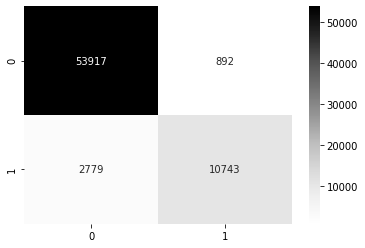

In [1251]:
print(metrics.confusion_matrix(Y,train_xgb),'\n')
sns.heatmap((metrics.confusion_matrix(Y,train_xgb)),annot=True,fmt='.5g',cmap='Greys');
tn, fp, fn, tp = metrics.confusion_matrix(Y,train_xgb).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:'
      , fn,'\n''True Positives:', tp,'\n')
print(metrics.classification_report(Y,train_xgb))

[[22826   664]
 [ 1681  4114]] 

True Negative: 22826 
False Positives: 664 
False Negatives: 1681 
True Positives: 4114 

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     23490
           1       0.86      0.71      0.78      5795

    accuracy                           0.92     29285
   macro avg       0.90      0.84      0.86     29285
weighted avg       0.92      0.92      0.92     29285



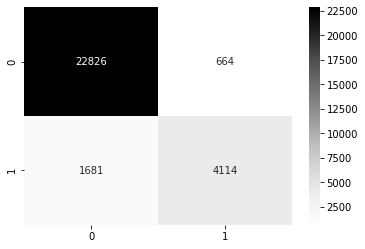

In [1252]:
print(metrics.confusion_matrix(Y_test,test_xgb),'\n')
sns.heatmap((metrics.confusion_matrix(Y_test,test_xgb)),annot=True,fmt='.5g',cmap='Greys');
tn, fp, fn, tp = metrics.confusion_matrix(Y_test,test_xgb).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:'
      , fn,'\n''True Positives:', tp,'\n')
print(metrics.classification_report(Y_test,test_xgb))

In [195]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_train=[]#defining an empty list
    for i in range(0,len(y_test_predict_prob[:,1])):#defining a loop
        if y_test_predict_prob[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_train.append(a)#adding either 1 or 0 based on the condition to the end of the list
    #defined by us
    print(round(j,3),metrics.accuracy_score(Y_test,custom_cutoff_train))

0.1 0.8950315861362472
0.2 0.9162711285641113
0.3 0.9221785897217005
0.4 0.9228956803824484
0.5 0.9218712651528086
0.6 0.9197882875192078
0.7 0.9169540720505378
0.8 0.9137442376643333
0.9 0.9108417278470207


In [23]:
custom_prob = 0.4 #defining the cut-off value of our choice
custom_cutoff_train=[]#defining an empty list
for i in range(0,len(y_test_predict_prob[:,1])):#defining a loop
    if y_test_predict_prob[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
        #greater than the custom cutoff value
        a=1#if the probability values are greater than the custom cutoff then the value should be 1
    else:
        a=0#if the probability values are less than the custom cutoff then the value should be 0
    custom_cutoff_train.append(a)#adding either 1 or 0 based on the condition to the end of the list
    #defined by us

[[22342  1148]
 [  847  4948]] 

True Negative: 22342 
False Positives: 1148 
False Negatives: 847 
True Positives: 4948 

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     23490
           1       0.81      0.85      0.83      5795

    accuracy                           0.93     29285
   macro avg       0.89      0.90      0.89     29285
weighted avg       0.93      0.93      0.93     29285



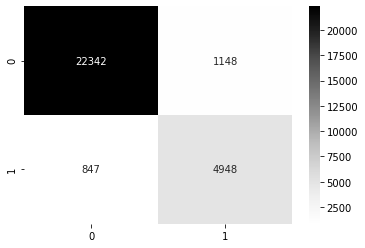

In [24]:
print(metrics.confusion_matrix(Y_test,custom_cutoff_train),'\n')
sns.heatmap((metrics.confusion_matrix(Y_test,custom_cutoff_train)),annot=True,fmt='.5g',cmap='Greys');
tn, fp, fn, tp = metrics.confusion_matrix(Y_test,custom_cutoff_train).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:'
      , fn,'\n''True Positives:', tp,'\n')
print(metrics.classification_report(Y_test,custom_cutoff_train))

In [1820]:
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": [81],
    "gamma":[2],
    "scale_pos_weight":[1],
    "learning_rate":[0.05],
    "subsample":[1],
    "colsample_bytree":[1],
    "colsample_bylevel":[1],
    "max_depth":[3]
}

# Type of scoring used to compare parameter combinations
#acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,cv=5,scoring='f1')
grid_obj = grid_obj.fit(X, Y)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

In [1821]:
train_xgb = xgb_tuned.predict(X)
test_xgb = xgb_tuned.predict(X_test)

In [1822]:
print (pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X.columns).sort_values('Imp',ascending=False))

                               Imp
envsat                    0.318803
jobsat                    0.294663
yof joining               0.106141
Recently_upskilled        0.052424
perf                      0.027450
TrainingTimesLastYear     0.026880
MaritalStatus_Single      0.026230
OfficeHours               0.023255
MaritalStatus_Married     0.022924
yr/com                    0.015897
TotalWorkExp              0.014895
YearsWithCurrManager      0.013858
age_bracket_Youth         0.013172
BusinessTravel_Sometimes  0.013077
yr/sal                    0.007998
sal_bracket_Medium        0.007846
age/sal                   0.007220
age_bracket_Old           0.004458
jobinv                    0.002809
NumCompaniesWorked        0.000000
Department_Finance        0.000000
StockOptionLevel          0.000000
PercentSalaryIncrement    0.000000
Gender_Male               0.000000
Department_Sales          0.000000
Department_HR             0.000000
Department_Ops            0.000000
HighestEducation_Mte

In [1823]:
y_test_predict_prob = xgb_tuned.predict_proba(X_test)

[[54806     3]
 [ 6407  7115]] 

True Negative: 54806 
False Positives: 3 
False Negatives: 6407 
True Positives: 7115 

              precision    recall  f1-score   support

           0       0.90      1.00      0.94     54809
           1       1.00      0.53      0.69     13522

    accuracy                           0.91     68331
   macro avg       0.95      0.76      0.82     68331
weighted avg       0.92      0.91      0.89     68331



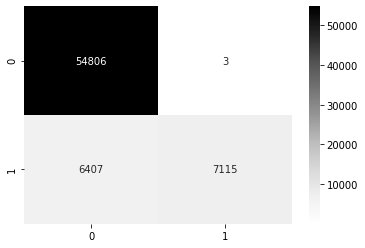

In [1824]:
print(metrics.confusion_matrix(Y,train_xgb),'\n')
sns.heatmap((metrics.confusion_matrix(Y,train_xgb)),annot=True,fmt='.5g',cmap='Greys');
tn, fp, fn, tp = metrics.confusion_matrix(Y,train_xgb).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:'
      , fn,'\n''True Positives:', tp,'\n')
print(metrics.classification_report(Y,train_xgb))

[[23487     3]
 [ 2713  3082]] 

True Negative: 23487 
False Positives: 3 
False Negatives: 2713 
True Positives: 3082 

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     23490
           1       1.00      0.53      0.69      5795

    accuracy                           0.91     29285
   macro avg       0.95      0.77      0.82     29285
weighted avg       0.92      0.91      0.90     29285



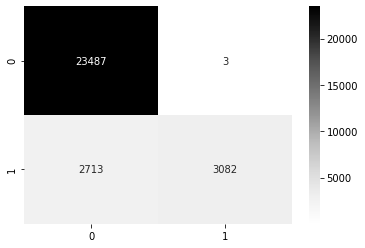

In [1825]:
print(metrics.confusion_matrix(Y_test,test_xgb),'\n')
sns.heatmap((metrics.confusion_matrix(Y_test,test_xgb)),annot=True,fmt='.5g',cmap='Greys');
tn, fp, fn, tp = metrics.confusion_matrix(Y_test,test_xgb).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:'
      , fn,'\n''True Positives:', tp,'\n')
print(metrics.classification_report(Y_test,test_xgb))

In [1761]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_train=[]#defining an empty list
    for i in range(0,len(y_test_predict_prob[:,1])):#defining a loop
        if y_test_predict_prob[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_train.append(a)#adding either 1 or 0 based on the condition to the end of the list
    #defined by us
    print(round(j,3),metrics.accuracy_score(Y_test,custom_cutoff_train))

0.1 0.6842410790507085
0.2 0.8689772921290764
0.3 0.9009731944681577
0.4 0.9073928632405669
0.5 0.9072562745432815
0.6 0.906675772579819
0.7 0.9064708895338911
0.8 0.9055830630015366
0.9 0.9055830630015366


In [81]:
custom_prob = 0.4 #defining the cut-off value of our choice
custom_cutoff_train=[]#defining an empty list
for i in range(0,len(y_test_predict_prob[:,1])):#defining a loop
    if y_test_predict_prob[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
        #greater than the custom cutoff value
        a=1#if the probability values are greater than the custom cutoff then the value should be 1
    else:
        a=0#if the probability values are less than the custom cutoff then the value should be 0
    custom_cutoff_train.append(a)#adding either 1 or 0 based on the condition to the end of the list
    #defined by us

[[22256  1234]
 [  682  5113]] 

True Negative: 22256 
False Positives: 1234 
False Negatives: 682 
True Positives: 5113 

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     23490
           1       0.81      0.88      0.84      5795

    accuracy                           0.93     29285
   macro avg       0.89      0.91      0.90     29285
weighted avg       0.94      0.93      0.94     29285



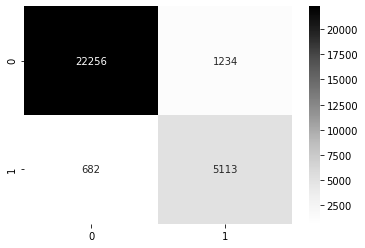

In [82]:
print(metrics.confusion_matrix(Y_test,custom_cutoff_train),'\n')
sns.heatmap((metrics.confusion_matrix(Y_test,custom_cutoff_train)),annot=True,fmt='.5g',cmap='Greys');
tn, fp, fn, tp = metrics.confusion_matrix(Y_test,custom_cutoff_train).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:'
      , fn,'\n''True Positives:', tp,'\n')
print(metrics.classification_report(Y_test,custom_cutoff_train))

In [1765]:
et_t=pd.read_csv("Test_Data_ET.csv")


In [1766]:
et_t1=et_t.copy()

In [1767]:
et_t1.drop('ID',axis=1,inplace=True)

In [1768]:
et_t1.loc[:,'envsat']=(et_t1.loc[:,'EnvironmentSatisfaction1']+et_t1.loc[:,'EnvironmentSatisfaction2'])/2
et_t1.loc[:,'jobsat']=(et_t1.loc[:,'JobSatisfaction1']+et_t1.loc[:,'JobSatisfaction2'])/2
et_t1.loc[:,'jobinv']=(et_t1.loc[:,'JobInvolvement1']+et_t1.loc[:,'JobInvolvement2'])/2
et_t1.loc[:,'perf']=(et_t1.loc[:,'PerformanceRating1']+et_t1.loc[:,'PerformanceRating2'])/2

In [1769]:
et_t1.drop(['EnvironmentSatisfaction1','EnvironmentSatisfaction2','JobSatisfaction1','JobSatisfaction2','JobInvolvement1','JobInvolvement2','PerformanceRating1','PerformanceRating2'],axis=1,inplace=True)

In [1770]:
#et_t1.loc[:,'envjob']=(et_t1.loc[:,'envsat']+et_t1.loc[:,'jobsat'])/2
#et_t1.loc[:,'jobperf']=(et_t1.loc[:,'jobinv']+et_t1.loc[:,'perf'])/2

In [1771]:
#et_t1.drop(['envsat','jobsat','jobinv','perf'],axis=1,inplace=True)

In [1772]:
et_t1.loc[:,'yr/sal']=et_t1.loc[:,'TotalWorkExp']/et_t1.loc[:,'MonthlySalary']

In [1773]:
et_t1.loc[:,'yr/com']=et_t1.loc[:,'TotalWorkExp']/et_t1.loc[:,'NumCompaniesWorked']

In [1774]:
et_t1.loc[et_t1.loc[:,'MonthlySalary']>=150000,'sal_bracket']='High'
et_t1.loc[((et_t1.loc[:,'MonthlySalary']>=75000) & (et_t1.loc[:,'MonthlySalary']<150000)),'sal_bracket']='Medium'
et_t1.loc[et_t1.loc[:,'MonthlySalary']<75000,'sal_bracket']='Low'

In [1775]:
et_t1.loc[:,'age/sal']=et_t1.loc[:,'Age']/et_t1.loc[:,'MonthlySalary']

In [1776]:
et_t1.drop('MonthlySalary',axis=1,inplace=True)

In [1777]:
et_t1.loc[et_t1.loc[:,'Age']>=45,'age_bracket']='Old'
et_t1.loc[((et_t1.loc[:,'Age']>=30) & (et_t1.loc[:,'Age']<45)),'age_bracket']='Medium'
et_t1.loc[et_t1.loc[:,'Age']<30,'age_bracket']='Youth'

In [1778]:
et_t1.drop('Age',axis=1,inplace=True)

In [1779]:
#et_t1=encoder.fit_transform(et_t1,inplace=True)

In [1780]:
#et_t1.rename(columns={'col_0':'Dis0','col_1':'Dis1','col_2':'Dis2','col_3':'Dis3','col_4':'Dis4'},inplace=True)

In [1781]:
#et_t1.loc[et_t1.loc[:,'DistanceFromHome']>=25,'dis']='Farthest'
#et_t1.loc[((et_t1.loc[:,'DistanceFromHome']>=15) & (et_t1.loc[:,'DistanceFromHome']<25)),'dis']='Far'
#et_t1.loc[((et_t1.loc[:,'DistanceFromHome']>=5) & (et_t1.loc[:,'DistanceFromHome']<15)),'dis']='Medium'
#et_t1.loc[et_t1.loc[:,'DistanceFromHome']<5,'dis']='Near'

In [1782]:
#et_t1.drop('DistanceFromHome',axis=1,inplace=True)

In [1783]:
#et_t1.loc[et_t1.loc[:,'TotalWorkExp']>=36,'exp_bracket']='SrMgr'
#et_t1.loc[((et_t1.loc[:,'TotalWorkExp']>=22) & (et_t1.loc[:,'TotalWorkExp']<36)),'exp_bracket']='MidMgr'
#et_t1.loc[((et_t1.loc[:,'TotalWorkExp']>=8) & (et_t1.loc[:,'TotalWorkExp']<22)),'exp_bracket']='Sr'
#et_t1.loc[et_t1.loc[:,'TotalWorkExp']<8,'exp_bracket']='Fresh'

In [1784]:
#et_t1.drop('TotalWorkExp',axis=1,inplace=True)

In [1785]:
#et_t1.loc[et_t1['Age']<=et_t1['TotalWorkExp']+16,'Age']=et_t1.loc[:,'TotalWorkExp']+16

In [1786]:
et_t1_dummy = pd.get_dummies(et_t1,drop_first=True)
et_t1_dummy.head()

,Recently_upskilled,RemoteWork,PercentSalaryIncrement,OfficeHours,StockOptionLevel,YearsSinceLastPromotion,JobLevel,TotalWorkExp,yof joining,YearsWithCurrManager,...,MaritalStatus_Single,Gender_Male,Department_Finance,Department_HR,Department_Ops,Department_Sales,sal_bracket_Low,sal_bracket_Medium,age_bracket_Old,age_bracket_Youth
0,0,0,13,8,1,2.0,1,21,2015,3,...,1,0,0,1,0,0,1,0,0,0
1,0,0,26,8,2,2.0,3,12,2009,7,...,1,0,0,0,0,1,0,1,0,0
2,0,0,23,7,2,0.0,1,9,2014,4,...,1,1,0,0,0,1,1,0,0,1
3,0,0,12,8,1,NaN,1,18,2016,0,...,0,1,0,1,0,0,0,1,0,0
4,0,0,23,8,1,1.0,1,4,2014,3,...,1,0,0,0,0,1,1,0,0,1


In [1275]:
et_t1_dummy.shape

(41836, 49)

In [1276]:
test_predict= xgb.predict(et_t1_dummy)

In [1277]:
test_predict_prob = xgb.predict_proba(et_t1_dummy)

In [1826]:
test_predict= xgb_tuned.predict(et_t1_dummy)

In [1827]:
test_predict_prob = xgb_tuned.predict_proba(et_t1_dummy)

In [1828]:
custom_prob = 0.65#defining the cut-off value of our choice
custom_cutoff_train=[]#defining an empty list
for i in range(0,len(test_predict_prob[:,1])):#defining a loop
    if test_predict_prob[:,1][i] > custom_prob:#issuing a condition for our probability values to be 
        #greater than the custom cutoff value
        a=1#if the probability values are greater than the custom cutoff then the value should be 1
    else:
        a=0#if the probability values are less than the custom cutoff then the value should be 0
    custom_cutoff_train.append(a)#adding either 1 or 0 based on the condition to the end of the list
    #defined by us

In [1829]:
et_t['Employeeturnover']=custom_cutoff_train

In [1830]:
et_t=et_t[['ID','Employeeturnover']]

In [1831]:
et_t.to_csv("result.csv",index=False)